In [3]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Config
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print(" Imports OK")

 Imports OK


In [6]:
# Chargement des données

# Charger M15 clean 2022
df = pd.read_csv('../data/processed/DAT_MT_GBPUSD_M15_2022_clean.csv', parse_dates=['timestamp'])
df = df.set_index('timestamp')

print(f"Shape: {df.shape}")
print(f"Période: {df.index.min()} → {df.index.max()}")
df.head()

Shape: (24242, 6)
Période: 2022-01-02 18:00:00 → 2022-12-30 16:30:00


,open,high,low,close,gap,return_1
timestamp,,,,,,
2022-01-02 18:00:00,1.35287,1.35338,1.35257,1.35258,0.000133,NaN
2022-01-02 18:15:00,1.35257,1.35275,1.35230,1.35240,0.000007,-0.000133
2022-01-02 18:30:00,1.35240,1.35242,1.35227,1.35230,0.000000,-0.000074
2022-01-02 18:45:00,1.35233,1.35234,1.35201,1.35216,0.000022,-0.000104
2022-01-02 19:00:00,1.35209,1.35251,1.35205,1.35212,0.000052,-0.000030


In [7]:
print("=== STATISTIQUES DESCRIPTIVES ===\n")
print(df.describe())
print(f"\nMissing values:\n{df.isnull().sum()}")

=== STATISTIQUES DESCRIPTIVES ===

               open          high           low         close           gap  \
count  24242.000000  24242.000000  24242.000000  24242.000000  24242.000000   
mean       1.236320      1.236930      1.235707      1.236312      0.000017   
std        0.076134      0.075967      0.076289      0.076131      0.000114   
min        1.039970      1.051140      1.032610      1.040000      0.000000   
25%        1.184782      1.185570      1.183993      1.184785      0.000000   
50%        1.221870      1.222490      1.221185      1.221860      0.000008   
75%        1.307828      1.308407      1.307460      1.307820      0.000016   
max        1.374630      1.374870      1.374000      1.374610      0.008605   

           return_1  
count  24241.000000  
mean      -0.000005  
std        0.000400  
min       -0.000588  
25%       -0.000343  
50%        0.000000  
75%        0.000326  
max        0.000588  

Missing values:
open        0
high        0
low       

In [8]:
# Calcul des rendements

df['return'] = df['close'].pct_change()
df['log_return'] = np.log(df['close'] / df['close'].shift(1))

# Stats rendements
print(f"Rendement moyen: {df['return'].mean():.6f}")
print(f"Volatilité: {df['return'].std():.6f}")
print(f"Skewness: {df['return'].skew():.4f}")
print(f"Kurtosis: {df['return'].kurtosis():.4f}")

Rendement moyen: -0.000004
Volatilité: 0.000844
Skewness: -2.2968
Kurtosis: 122.5547


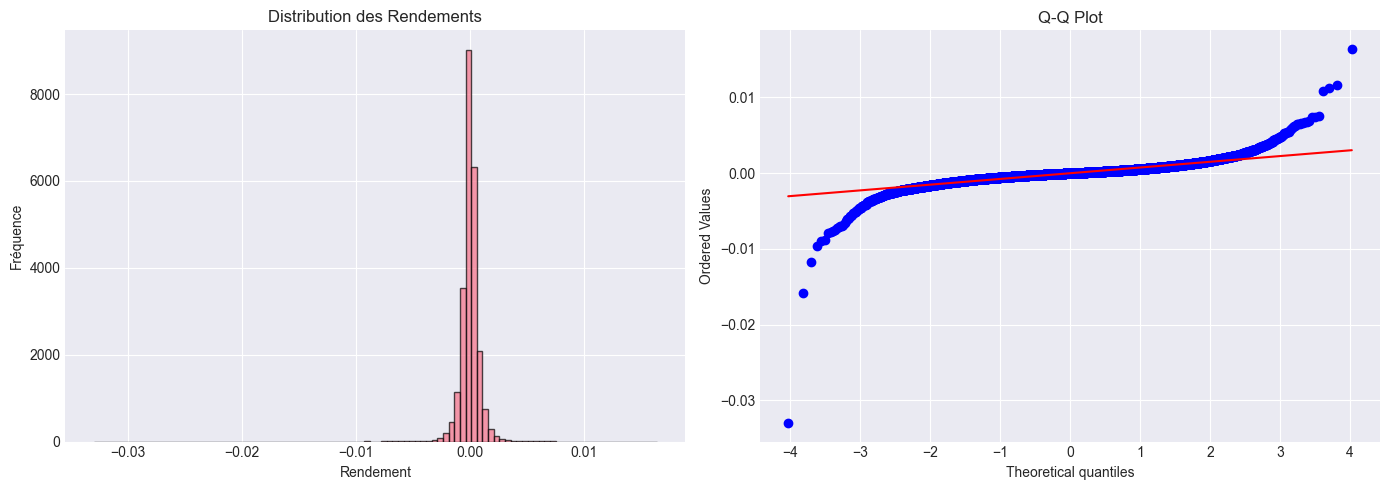

In [13]:
# Distribution des rendements 

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme
axes[0].hist(df['return'].dropna(), bins=100, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution des Rendements')
axes[0].set_xlabel('Rendement')
axes[0].set_ylabel('Fréquence')

# Q-Q plot
from scipy import stats
stats.probplot(df['return'].dropna(), dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

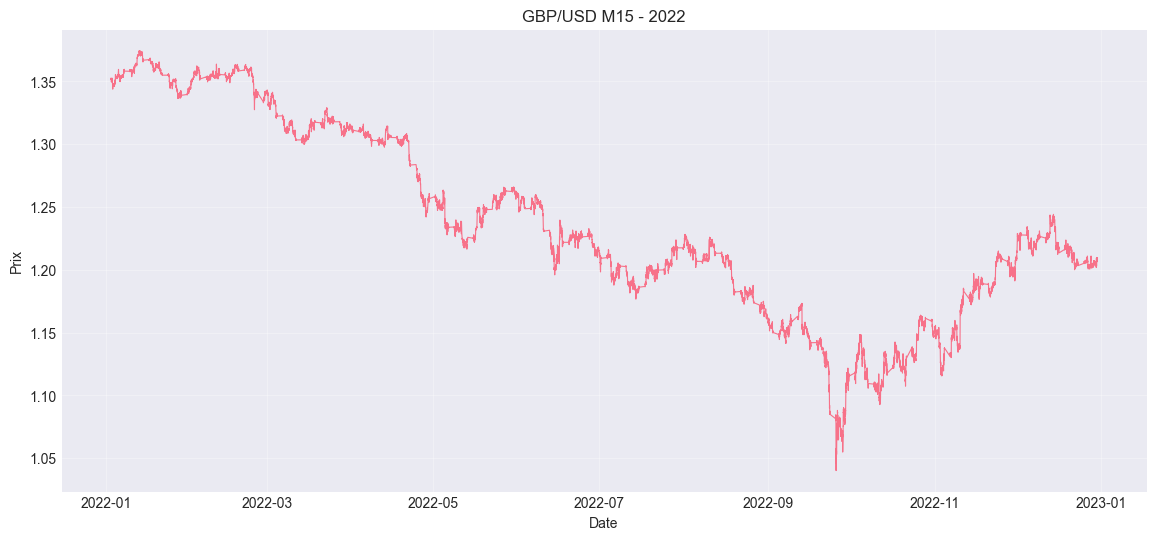

In [14]:
# Evolution du prix

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['close'], linewidth=0.8)
plt.title('GBP/USD M15 - 2022')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.grid(True, alpha=0.3)
plt.show()

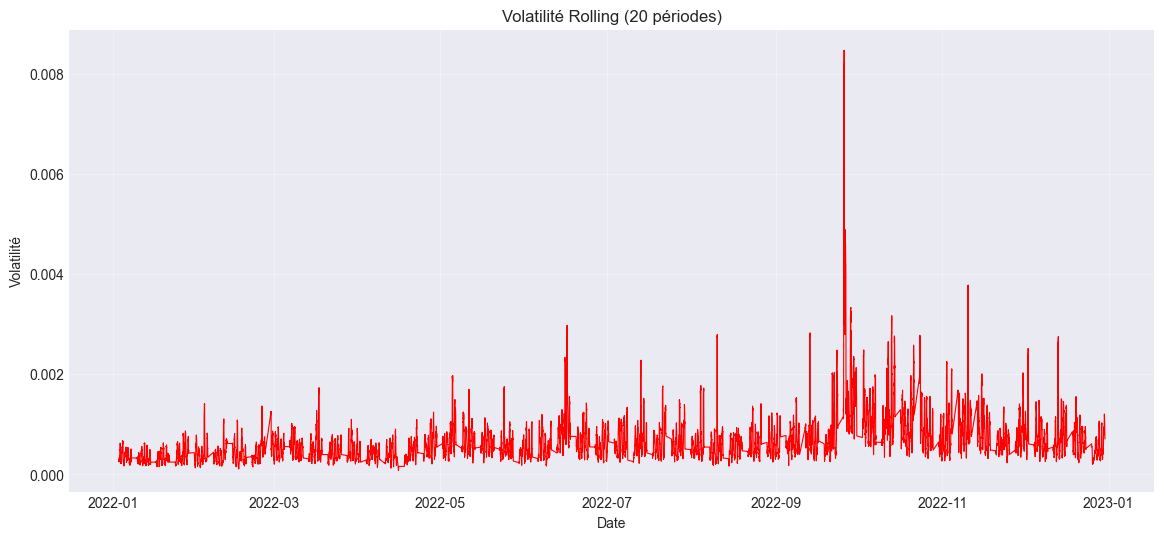

In [15]:
# Volatilité Rolling (20 périodes)

df['volatility_20'] = df['return'].rolling(20).std()

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['volatility_20'], linewidth=0.8, color='red')
plt.title('Volatilité Rolling (20 périodes)')
plt.xlabel('Date')
plt.ylabel('Volatilité')
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
# Test de stationnarité ADF

def adf_test(series, name=''):
    result = adfuller(series.dropna())
    print(f'=== Test ADF - {name} ===')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value:.4f}')
    
    if result[1] < 0.05:
        print(" Série STATIONNAIRE (p < 0.05)")
    else:
        print(" Série NON-STATIONNAIRE (p >= 0.05)")
    print()

# Tests
adf_test(df['close'], 'Prix')
adf_test(df['return'], 'Rendements')

=== Test ADF - Prix ===
ADF Statistic: -1.5241
p-value: 0.5216
Critical Values:
  1%: -3.4306
  5%: -2.8617
  10%: -2.5668
 Série NON-STATIONNAIRE (p >= 0.05)

=== Test ADF - Rendements ===
ADF Statistic: -26.4931
p-value: 0.0000
Critical Values:
  1%: -3.4306
  5%: -2.8617
  10%: -2.5668
 Série STATIONNAIRE (p < 0.05)



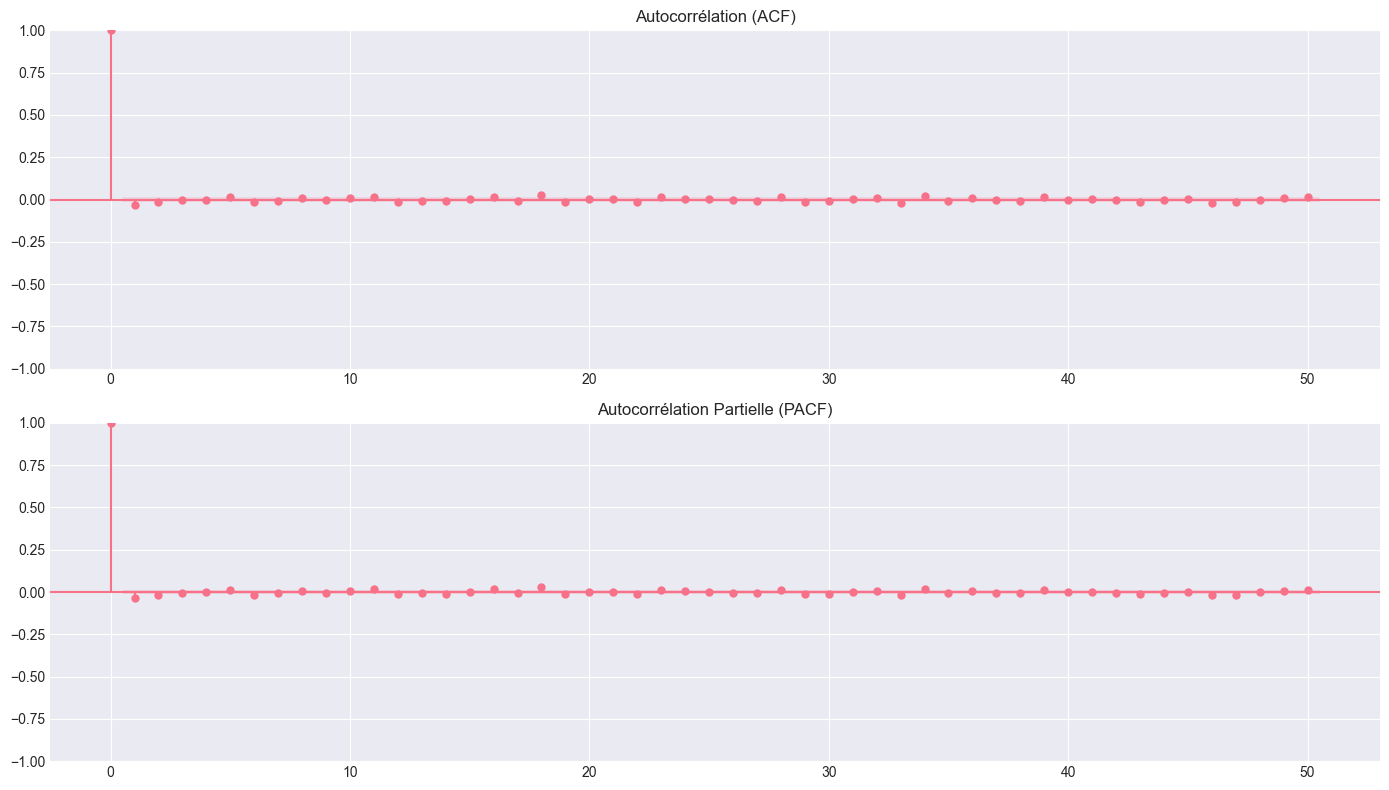

In [17]:
# ACF et PACF des rendements

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

plot_acf(df['return'].dropna(), lags=50, ax=axes[0])
axes[0].set_title('Autocorrélation (ACF)')

plot_pacf(df['return'].dropna(), lags=50, ax=axes[1])
axes[1].set_title('Autocorrélation Partielle (PACF)')

plt.tight_layout()
plt.show()

In [ ]:
# Patterns Horaires
df['hour'] = df.index.hour

hourly_stats = df.groupby('hour').agg({
    'return': ['mean', 'std', 'count']
}).round(6)

print("=== STATISTIQUES HORAIRES ===\n")
print(hourly_stats)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

hourly_stats['return']['mean'].plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Rendement Moyen par Heure')
axes[0].set_xlabel('Heure')
axes[0].set_ylabel('Rendement Moyen')

hourly_stats['return']['std'].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Volatilité par Heure')
axes[1].set_xlabel('Heure')
axes[1].set_ylabel('Volatilité')

plt.tight_layout()
plt.show()